In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(filepath_or_buffer="fish_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [4]:
data.describe(include="all")

,species,length,weight,w_l_ratio
count,4080,4080.000000,4080.000000,4080.000000
unique,9,NaN,NaN,NaN
top,Setipinna taty,NaN,NaN,NaN
freq,480,NaN,NaN,NaN
mean,NaN,17.353544,3.739875,0.252782
std,NaN,7.114684,1.040365,0.123046
min,NaN,6.360000,2.050000,0.080000
25%,NaN,11.327500,3.070000,0.170000
50%,NaN,17.350000,3.310000,0.190000
75%,NaN,22.585000,4.100000,0.340000


In [168]:
data.head(15)

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
5,Anabas testudineus,9.35,3.28,0.35
6,Anabas testudineus,9.42,3.33,0.35
7,Anabas testudineus,7.92,3.13,0.39
8,Anabas testudineus,6.98,3.16,0.45
9,Anabas testudineus,8.42,3.26,0.39


In [5]:
data.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [7]:
print(data.duplicated().sum())

109


In [10]:
cleaned_duplicates=data.drop_duplicates()
print(cleaned_duplicates.duplicated().sum())


0


Text(0.5, 1.0, 'Frequency vs Species')

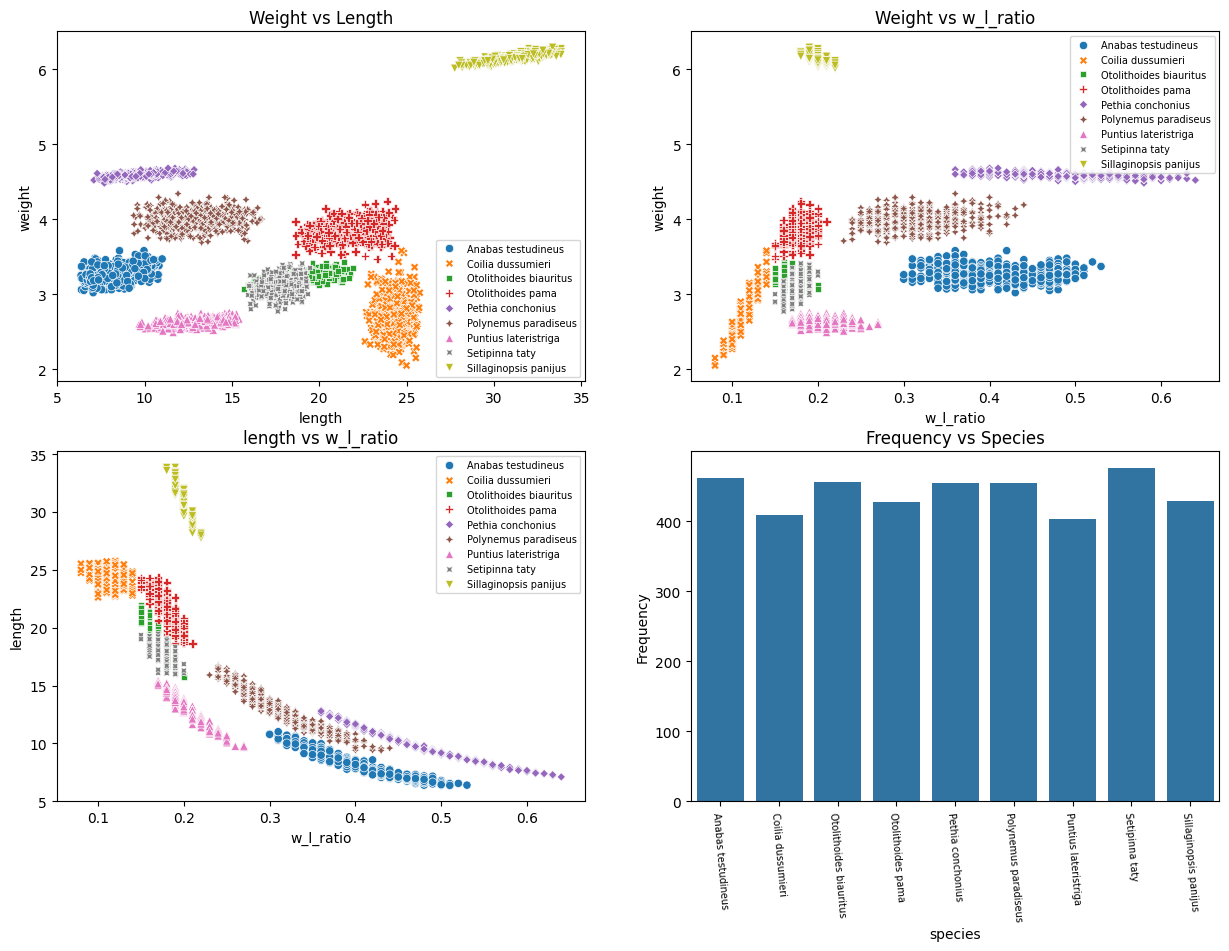

In [120]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(data=cleaned_duplicates,x="length",y="weight",hue="species",style="species",ax=ax[0,0])
sns.scatterplot(data=cleaned_duplicates,x="w_l_ratio",y="weight",hue="species",style="species",ax=ax[0,1])
sns.scatterplot(data=cleaned_duplicates,x="w_l_ratio",y="length",hue="species",style="species",ax=ax[1,0])
ax[0,0].legend(fontsize=7)
ax[0,0].set_title("Weight vs Length")
ax[0,1].legend(fontsize=7)
ax[0,1].set_title("Weight vs w_l_ratio")
ax[1,0].legend(fontsize=7)
ax[1,0].set_title("length vs w_l_ratio")
sns.countplot(data=cleaned_duplicates,x="species",ax=ax[1,1])
ax[1,1].tick_params(axis="x",labelsize=7,rotation=-85)
ax[1,1].set_ylabel("Frequency")
ax[1,1].set_title("Frequency vs Species")


In [88]:
from sklearn.preprocessing import LabelEncoder
x=cleaned_duplicates.drop(columns="species")
output=cleaned_duplicates["species"]
encoder=LabelEncoder()
y=encoder.fit_transform(output)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [90]:
from keras._tf_keras.keras import Sequential
from keras._tf_keras.keras.layers import Dense
model=Sequential()
model.add(Dense(9,activation="relu",input_shape=(3,)))
model.add(Dense(180,activation="sigmoid"))
model.add(Dense(9,activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
model.fit(x_train,y_train,epochs=100)

c:\Users\julth\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1662 - loss: 2.1339
Epoch 2/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3830 - loss: 1.7263
Epoch 3/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 1.4448
Epoch 4/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6398 - loss: 1.2702
Epoch 5/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 1.1229
Epoch 6/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7561 - loss: 0.9906
Epoch 7/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7727 - loss: 0.8889
Epoch 8/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.7937
Epoch 9/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8395 - loss: 0.7468
Epoch 10/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8549 - loss: 0.6963
Epoch 11/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.6621
Epoch 12/100
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [91]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 9)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 180)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │         1,629 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,397 (40.62 KB)

 Trainable params: 3,465 (13.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,932 (27.08 KB)

In [160]:
y_predict=model.predict(x_test)
prediction=[]
for value in y_predict:
    prediction.append(np.argmax(value))


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [161]:
prediciton_inverse=pd.Series(encoder.inverse_transform(prediction))
y_inverse=pd.Series(encoder.inverse_transform(y_test))
compare=pd.DataFrame(data={"Actual Y":y_inverse,"Predicted Y":prediciton_inverse})
compare.head(15)

,Actual Y,Predicted Y
0,Sillaginopsis panijus,Sillaginopsis panijus
1,Sillaginopsis panijus,Sillaginopsis panijus
2,Pethia conchonius,Pethia conchonius
3,Otolithoides pama,Otolithoides pama
4,Anabas testudineus,Anabas testudineus
5,Setipinna taty,Setipinna taty
6,Anabas testudineus,Anabas testudineus
7,Pethia conchonius,Pethia conchonius
8,Anabas testudineus,Anabas testudineus
9,Sillaginopsis panijus,Sillaginopsis panijus


In [102]:
from sklearn.metrics import classification_report, confusion_matrix
confusion=confusion_matrix(y_test,prediction)
report=classification_report(y_test,prediction)


In [127]:
confusion

array([[140,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  69,   0,   0,   0,   0,  80,   0],
       [  0,   0,   0, 138,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 119,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 122,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 117,   0,   0],
       [  0,   0,  19,   0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 125]], dtype=int64)

Text(0.5, 23.52222222222222, 'Y Prediction')

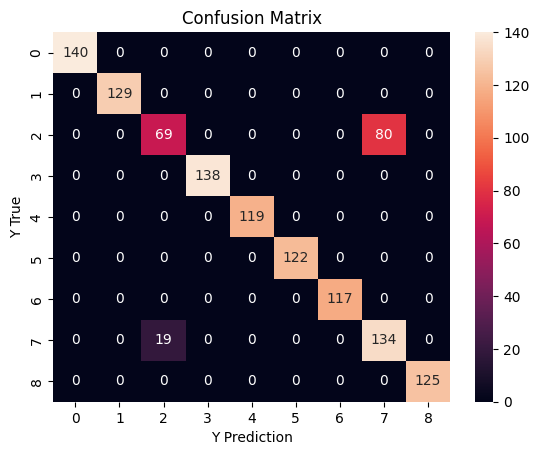

In [167]:
sns.heatmap(confusion,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Y True")
plt.xlabel("Y Prediction")

In [106]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       140
           1       1.00      1.00      1.00       129
           2       0.78      0.46      0.58       149
           3       1.00      1.00      1.00       138
           4       1.00      1.00      1.00       119
           5       1.00      1.00      1.00       122
           6       1.00      1.00      1.00       117
           7       0.63      0.88      0.73       153
           8       1.00      1.00      1.00       125

    accuracy                           0.92      1192
   macro avg       0.93      0.93      0.92      1192
weighted avg       0.93      0.92      0.91      1192



In [125]:
from keras._tf_keras.keras.saving import save_model
save=save_model(model,"FishSpeciesPrediction.keras")